# IDS - Data and Plotting

- Importing libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- Opening the CSV file and converting the `Unix` timestamp to human-readable time string

In [47]:
dataframe = pd.read_csv('./data/dataset.csv', sep=';')

dataframe['formatted_date'] = pd.to_datetime(dataframe['timestamp'], unit='s')

dataframe

,timestamp,numberOfPackets,packetsTotalSize,packetsMean,formatted_date
0,920898000,268,55749,208.018657,1999-03-08 13:00:00
1,920898060,573,190379,332.249564,1999-03-08 13:01:00
2,920898120,185,35880,193.945946,1999-03-08 13:02:00
3,920898180,202,69494,344.029703,1999-03-08 13:03:00
4,920898240,1204,293520,243.787375,1999-03-08 13:04:00
...,...,...,...,...,...
6419,921322500,28,2383,85.107143,1999-03-13 10:55:00
6420,921322560,63,6169,97.920635,1999-03-13 10:56:00
6421,921322620,31,2464,79.483871,1999-03-13 10:57:00
6422,921322680,26,2350,90.384615,1999-03-13 10:58:00


- Calculating NMSE and MAPE

In [49]:
NMSE = dataframe['packetsMean'].values - dataframe['packetsTotalSize'].values
NMSE = np.square(NMSE)
NMSE = np.sum(NMSE)
NMSE = NMSE / len(dataframe['packetsMean'].values)
NMSE = np.sqrt(NMSE)
NMSE = NMSE / np.mean(dataframe['packetsTotalSize'].values)
NMSE = round(NMSE, 2)

MAPE = dataframe['packetsMean'].values - dataframe['numberOfPackets'].values
MAPE = np.abs(MAPE)
MAPE = MAPE / dataframe['numberOfPackets'].values
MAPE = np.sum(MAPE)
MAPE = MAPE / len(dataframe['packetsMean'].values)
MAPE = MAPE * 100
MAPE = round(MAPE, 2)

- Calculating the SMA with a sliding window of size 10

In [50]:
window_size = 10
dataframe['SMA'] = dataframe['packetsTotalSize'].rolling(window=window_size).mean()
dataframe.dropna(inplace=True)

- Identifying anomalies...
  - Criteria: Packets Total Size for timespan is greater than 2 times the SMA for the same period

In [53]:
dataframe['is_anomaly'] = dataframe['packetsTotalSize'] > 2 * dataframe['SMA']
dataframe

,timestamp,numberOfPackets,packetsTotalSize,packetsMean,formatted_date,SMA,is_anomaly
9,920898540,164,62129,378.835366,1999-03-08 13:09:00,110866.9,False
10,920898600,206,40746,197.796117,1999-03-08 13:10:00,109366.6,False
11,920898660,389,114691,294.835476,1999-03-08 13:11:00,101797.8,False
12,920898720,80,24462,305.775000,1999-03-08 13:12:00,100656.0,False
13,920898780,144,40868,283.805556,1999-03-08 13:13:00,97793.4,False
...,...,...,...,...,...,...,...
6419,921322500,28,2383,85.107143,1999-03-13 10:55:00,3849.8,False
6420,921322560,63,6169,97.920635,1999-03-13 10:56:00,4183.7,False
6421,921322620,31,2464,79.483871,1999-03-13 10:57:00,4222.1,False
6422,921322680,26,2350,90.384615,1999-03-13 10:58:00,4165.7,False


- Creating and customizing the final plot

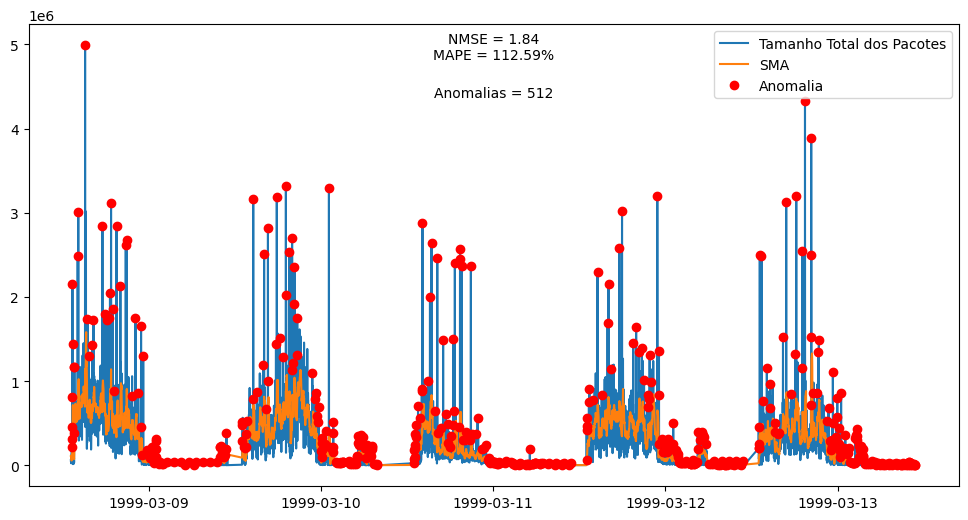

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))

# Add:
# 1. Line for Packets Total Size
# 2. SMA
# 3. Anomalies
ax.plot(dataframe['formatted_date'], dataframe['packetsTotalSize'], label='Tamanho Total dos Pacotes')
ax.plot(dataframe['formatted_date'], dataframe['SMA'], label='SMA')
ax.plot(dataframe.loc[dataframe['is_anomaly'], 'formatted_date'], dataframe.loc[dataframe['is_anomaly'], 'packetsTotalSize'], 'ro', label='Anomalia')

# Add texts for identifying data
ax.text(0.5, 0.95, f'NMSE = {NMSE}\nMAPE = {MAPE}%', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.5, 0.85, f'Anomalias = {dataframe["is_anomaly"].sum()}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Show plot
ax.legend()
plt.show()